In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy import stats

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv("dataset02.csv")

In [5]:
data.describe()

/tmp/Task 3/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,y
count,2.060000e+02
mean,4.854369e+156
std,inf
min,-5.744308e+00
25%,1.219424e+01
50%,2.848690e+01
75%,4.031530e+01
max,1.000000e+159


In [6]:
data.head()

,x,y
0,46.56922442211345,43.901322
1,46.799749882612765,47.682727
2,49.70505782865616,46.772946
3,35.73995379842663,32.640444
4,11.392664643376904,5.662792


In [7]:
data.shape

(207, 2)

In [8]:
data_numeric = data.apply(pd.to_numeric, errors='coerce') 

In [9]:
data_numeric.shape

(207, 2)

In [10]:
data_numeric.isnull().sum()

x    2
y    1
dtype: int64

In [11]:
clean_data = data_numeric.dropna()

In [12]:
clean_data.shape

(204, 2)

In [13]:
z_scores = np.abs(zscore(clean_data))
print('\nZ-Scores: ')
z_scores


Z-Scores: 


/tmp/Task 3/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:11002: RuntimeWarning: overflow encountered in multiply
  var = _xp_mean(x_mean * x_mean_conj, keepdims=keepdims, **kwargs)


array([[1.40260418, 0.        ],
       [1.41823393, 0.        ],
       [1.61521542, 0.        ],
       [0.66837362, 0.        ],
       [0.98238609, 0.        ],
       [1.00163734, 0.        ],
       [0.91117   , 0.        ],
       [1.58540763, 0.        ],
       [1.31477344, 0.        ],
       [1.63032192, 0.        ],
       [1.47290623, 0.        ],
       [0.89633478, 0.        ],
       [0.11098071, 0.        ],
       [0.50491657, 0.        ],
       [0.0543317 , 0.        ],
       [1.1344641 , 0.        ],
       [1.0987534 , 0.        ],
       [0.30645036, 0.        ],
       [0.0668941 , 0.        ],
       [1.11739667, 0.        ],
       [1.08454985, 0.        ],
       [0.26147363, 0.        ],
       [1.42733309, 0.        ],
       [0.68913408, 0.        ],
       [1.75257078, 0.        ],
       [0.29250762, 0.        ],
       [0.42381908, 0.        ],
       [1.60346566, 0.        ],
       [0.62325873, 0.        ],
       [1.38329266, 0.        ],
       [0.

In [14]:
threshold = 2  # Typical threshold for Z-scores
data_no_outliers = clean_data[(z_scores < threshold).all(axis=1)]
print(data_no_outliers.describe())

                x              y
count  204.000000   2.040000e+02
mean    25.882016  4.901961e+156
std     14.785425            inf
min      0.033101  -5.744308e+00
25%     11.893251   1.287338e+01
50%     26.303558   2.861742e+01
75%     37.954982   4.049568e+01
max     50.000000  1.000000e+159


/tmp/Task 3/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


In [15]:
# Replace infinities with NaN
data_no_outliers = data_no_outliers.replace([np.inf, -np.inf], np.nan)

# Drop any remaining NaN
data_no_outliers = data_no_outliers.dropna()


In [16]:
print(data_no_outliers.isna().sum())
print(np.isfinite(data_no_outliers).all())


x    0
y    0
dtype: int64
x    True
y    True
dtype: bool


In [17]:
# Remove infinities
data_no_outliers = data_no_outliers.replace([np.inf, -np.inf], np.nan)

# Remove NaNs
data_no_outliers = data_no_outliers.dropna()

# Optional: clip extreme values
data_no_outliers = data_no_outliers.clip(-1e3, 1e3)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_no_outliers_scaled = pd.DataFrame(scaler.fit_transform(data_no_outliers), 
                                       columns=data_no_outliers.columns)


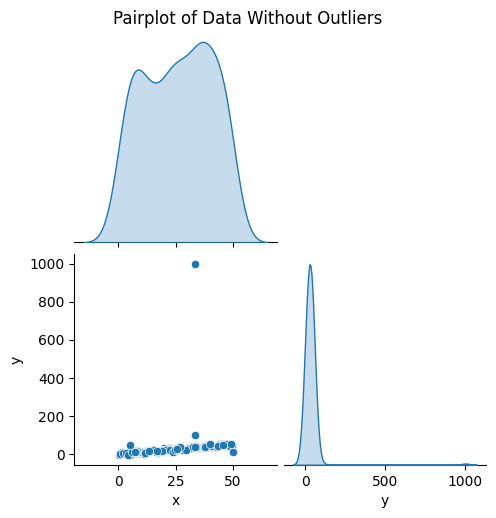

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data_no_outliers, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Data Without Outliers", y=1.02)
plt.show()

In [20]:
Q1 = data_no_outliers.quantile(0.25)
Q3 = data_no_outliers.quantile(0.75)
IQR = Q3 - Q1
final_data = data_no_outliers[~((data_no_outliers < (Q1 - 1.5 * IQR)) | (data_no_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
final_data

,x,y
0,46.569224,43.901322
1,46.799750,47.682727
2,49.705058,46.772946
3,35.739954,32.640444
4,11.392665,5.662792
...,...,...
197,45.594352,49.994189
198,7.070954,8.206501
199,33.333685,38.726312
205,5.000000,50.000000


In [22]:
#Normalisation

final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())

In [23]:
training_data = final_data.sample(frac=0.8, random_state=42)
training_data.to_csv("dataset02_training.csv", index=False)

testing_data = final_data.drop(training_data.index)
testing_data.to_csv("dataset02_testing.csv", index=False)


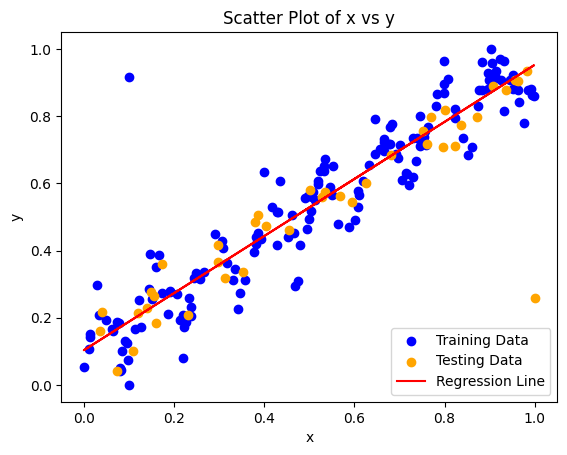

In [24]:
plt.scatter(training_data['x'], training_data['y'], color='blue', label='Training Data')
plt.scatter(testing_data['x'], testing_data['y'], color='orange', label='Testing Data')
plt.plot(training_data['x'], sm.OLS(training_data['y'], sm.add_constant(training_data[['x']])).fit().predict(sm.add_constant(training_data[['x']])), color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.legend()
plt.savefig('UE_04_App2_ScatterVisualizationAndOLSModel.pdf')
plt.show()

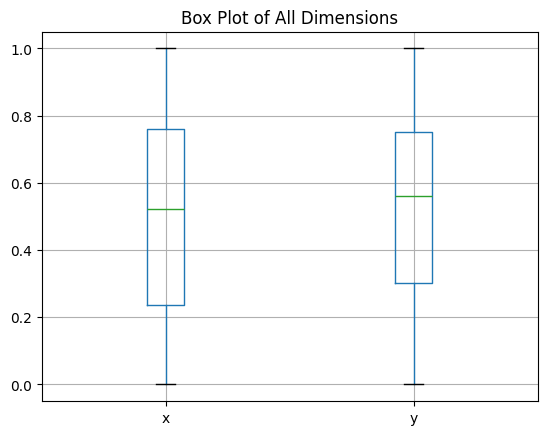

In [25]:
final_data.boxplot()
plt.title('Box Plot of All Dimensions')
plt.savefig('UE_04_App2_BoxPlot.pdf')
plt.show()

In [27]:
from UE_04_LinearRegDiagnostic import LinearRegDiagnostic
import statsmodels.formula.api as smf

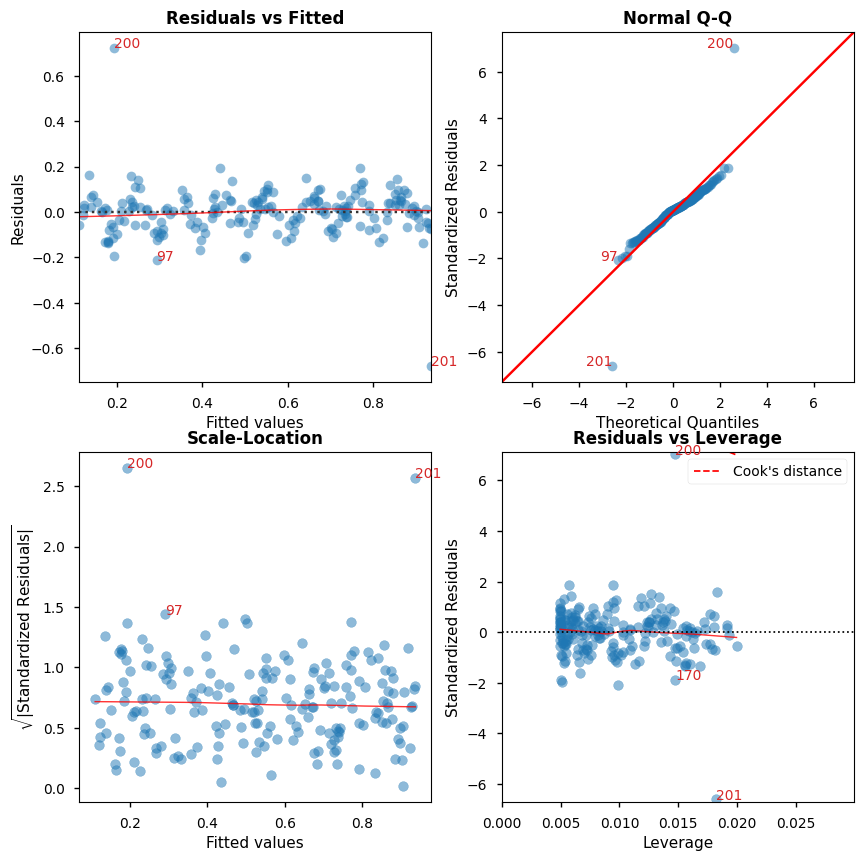

    Features  VIF Factor
1          x        1.00
0  Intercept        4.03


In [28]:
model = smf.ols('y ~ x', data=final_data).fit()

# Initialize the LinearRegDiagnostic class
diagnostic = LinearRegDiagnostic(model)

vif_table, fig, ax = diagnostic(plot_context='seaborn-v0_8-notebook')
fig.set_size_inches(12, 8)

# Adjust layout to reduce overlap
fig.tight_layout()
fig.savefig('UE_04_App2_DiagnosticPlots.pdf')

print(vif_table)

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']